Utilizaremos un set de datos de las policias de New York del año 2009 y 2010. (2009_1perc.csv y 2010_1perc.csv) los cuales nos darán información
de los procedimientos policiales realizados. Además se le entregará el
diccionario de variables para que pueda consultar que significa cada
categoría dentro de las variables.

● La variable respuesta 'arstmade' informa si los procedimientos policiales
han terminado en arresto o no, y el objetivo será realizar un modelo de
Machine Learning para predecir si un futuro procedimiento terminará en
arresto.

1.- Enliste todas las librerias que utilizará 

Nota: Se recomienda ir actualizando la lista conforme las necesidades vaya
teniendo durante el desarrollo de la prueba

In [58]:
import warnings
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.svm import SVR

warnings.filterwarnings("ignore")

2.- Importación y revisión de los datos Importe ambos sets. Dado que la fuente de datos proviene de la misma base, tienen las mismas columnas. Consolide ambos sets y reporte una exploración básica de los datos (numero de filas/columnas, tipos de datos, estadísticas básicas, casos perdidos)

In [59]:
#Dividir en punto y coma ademas de considerar el punto como decimal. Y mostar. 
df_1 = pd.read_csv("2009_1perc.csv", sep=';', decimal='.')
display(df_1)

,Unnamed: 0,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,178048,2009,41,1779,4032009,130,A,O,P,1.0,...,,41,G,7,,1013067,238633,CM,1,20
1,498873,2009,108,5805,10292009,1050,A,O,P,3.0,...,,108,J,,,1012043,212157,CM,1,14
2,463573,2009,43,8340,10062009,1450,1,O,P,1.0,...,,43,E,,,1017599,240200,CM,1,20
3,43626,2009,77,932,1232009,1843,A,O,P,5.0,...,,77,J,4,35,1002625,183442,CM,1,24
4,563921,2009,110,11224,12132009,1655,A,O,P,3.0,...,,110,H,,,1024535,209890,CM,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5807,167475,2009,52,3719,3282009,210,A,O,P,1.0,...,,52,A,,,1009910,255837,CM,1,9
5808,452302,2009,79,15751,9292009,2008,A,O,P,3.0,...,,79,F,17,,1001545,192836,CM,1,20
5809,310352,2009,69,3024,6262009,1937,1,O,P,1.0,...,,69,B,,,1012860,174682,CM,1,85
5810,132886,2009,76,1303,3102009,59,1,O,H,1.0,...,,76,A,10,,981820,185424,CM,1,27


In [60]:
#Dividir en punto y coma ademas de considerar el punto como decimal. Y mostar. 
df_2 = pd.read_csv("2010_1perc.csv", sep=';', decimal='.')
display(df_2)

,Unnamed: 0,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,30569,2010,6,487,1192010,1420,1,O,P,2,...,,6,G,,38,983543,208767,CM,1,85
1,416235,2010,42,7138,9042010,225,1,I,T,10,...,,42,E,,,1014172,241737,CM,1,45
2,318345,2010,33,2628,6302010,1240,1,I,T,5,...,,33,B,6,,1000916,245710,CM,1,85
3,541524,2010,108,6384,11172010,2338,1,O,P,3,...,,108,J,,,1012612,212240,CM,1,28
4,113101,2010,14,2295,3072010,2240,1,I,T,5,...,,14,C,7,,987636,212439,CM,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6008,449178,2010,60,7062,9262010,45,1,O,H,2,...,,60,I,,,989382,155162,CM,1,20
6009,362162,2010,75,15797,7302010,10,A,O,P,1,...,,75,A,,,1012757,186018,CM,1,85
6010,208893,2010,123,830,4302010,1630,A,O,P,3,...,,123,E,,,933868,138600,CM,1,46
6011,551820,2010,115,13122,11232010,2100,1,O,P,1,...,,115,E,,,1014722,214388,CM,1,85


In [61]:
df = df_1
new_df = df_2
df = pd.concat([df, new_df])
df.index = range(df.shape[0])
df

,Unnamed: 0,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,178048,2009,41,1779,4032009,130,A,O,P,1.0,...,,41,G,7,,1013067,238633,CM,1,20
1,498873,2009,108,5805,10292009,1050,A,O,P,3.0,...,,108,J,,,1012043,212157,CM,1,14
2,463573,2009,43,8340,10062009,1450,1,O,P,1.0,...,,43,E,,,1017599,240200,CM,1,20
3,43626,2009,77,932,1232009,1843,A,O,P,5.0,...,,77,J,4,35,1002625,183442,CM,1,24
4,563921,2009,110,11224,12132009,1655,A,O,P,3.0,...,,110,H,,,1024535,209890,CM,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11820,449178,2010,60,7062,9262010,45,1,O,H,2.0,...,,60,I,,,989382,155162,CM,1,20
11821,362162,2010,75,15797,7302010,10,A,O,P,1.0,...,,75,A,,,1012757,186018,CM,1,85
11822,208893,2010,123,830,4302010,1630,A,O,P,3.0,...,,123,E,,,933868,138600,CM,1,46
11823,551820,2010,115,13122,11232010,2100,1,O,P,1.0,...,,115,E,,,1014722,214388,CM,1,85


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11825 entries, 0 to 11824
Columns: 112 entries, Unnamed: 0 to detailcm
dtypes: float64(11), int64(6), object(95)
memory usage: 10.1+ MB


In [63]:
df.describe()

,Unnamed: 0,year,pct,ser_num,datestop,timestop,perobs,perstop,compyear,comppct,repcmd,revcmd,dob,age,ht_feet,ht_inch,weight
count,11825.000000,11825.000000,11825.000000,11825.000000,1.182500e+04,11825.000000,11825.000000,11824.000000,11823.0,11823.0,11823.000000,11823.000000,1.182300e+04,11823.000000,11823.000000,11823.000000,11823.000000
mean,295983.814799,2009.508499,68.625624,5697.994334,6.364221e+06,1413.725497,2.654391,5.649611,0.0,0.0,243.346782,238.977501,7.316041e+06,28.969889,5.183287,6.408949,170.097014
std,170820.705702,0.499949,33.037826,5152.486022,3.429091e+06,744.726359,9.759031,9.758946,0.0,0.0,297.795447,299.401699,3.729483e+06,29.207564,0.398761,3.405039,37.198112
min,52.000000,2009.000000,1.000000,1.000000,1.012009e+06,0.000000,0.000000,1.000000,0.0,0.0,1.000000,1.000000,1.011900e+06,1.000000,3.000000,0.000000,1.000000
25%,147515.000000,2009.000000,42.000000,2002.000000,3.232009e+06,1000.000000,1.000000,3.000000,0.0,0.0,70.000000,66.000000,4.121982e+06,19.000000,5.000000,4.000000,150.000000
50%,296652.000000,2010.000000,73.000000,4366.000000,6.162010e+06,1605.000000,1.000000,5.000000,0.0,0.0,105.000000,103.000000,7.261981e+06,25.000000,5.000000,7.000000,170.000000
75%,443097.000000,2010.000000,102.000000,7840.000000,9.232009e+06,2035.000000,3.000000,5.000000,0.0,0.0,176.500000,176.000000,1.105199e+07,34.000000,5.000000,9.000000,180.000000
max,601281.000000,2010.000000,123.000000,31694.000000,1.231201e+07,2830.000000,926.000000,857.000000,0.0,0.0,879.000000,879.000000,1.231200e+07,999.000000,7.000000,11.000000,999.000000


3.- Preprocesamiento de datos
Habrá notado que los datos parecen tener ciertas inconsistencias. Siga los
siguientes pasos para limpiar este set:

- 3.1 Obtenga una lista con todas las variables categoricas que tengan entre 2 y 99 categorías (inclusive). (hint: son las variables tipo categoricas

In [64]:
def count_freq(df, selected_columns):
    return {i: df[i].unique().shape[0] for i in selected_columns}
def infer_datatype(df, datatype, drop_none=True):
    tmp_list = [i if df[i].dtype == datatype else None for i in df.columns]
    if drop_none is True:
        tmp_list = list(filter(lambda x: x != None, tmp_list))

    return tmp_list

In [65]:
object_data_type = infer_datatype(df, 'object')
integer_data_type = infer_datatype(df, 'int')
float_data_type = infer_datatype(df, 'float')

object_unique_vals = count_freq(df, object_data_type)
int_unique_vals = count_freq(df, integer_data_type)
float_unique_vals = count_freq(df, float_data_type)

In [66]:
ListaVariableCategorica = dict(filter(lambda x: x[1] < 100 and x[1] >= 2, object_unique_vals.items()))
ListaVariableCategorica = list(ListaVariableCategorica.keys())
ListaVariableCategorica

['recstat',
 'inout',
 'trhsloc',
 'typeofid',
 'explnstp',
 'othpers',
 'arstmade',
 'sumissue',
 'offunif',
 'officrid',
 'frisked',
 'searched',
 'contrabn',
 'adtlrept',
 'pistol',
 'riflshot',
 'asltweap',
 'knifcuti',
 'machgun',
 'othrweap',
 'pf_hands',
 'pf_wall',
 'pf_grnd',
 'pf_drwep',
 'pf_ptwep',
 'pf_baton',
 'pf_hcuff',
 'pf_pepsp',
 'pf_other',
 'radio',
 'ac_rept',
 'ac_inves',
 'rf_vcrim',
 'rf_othsw',
 'ac_proxm',
 'rf_attir',
 'cs_objcs',
 'cs_descr',
 'cs_casng',
 'cs_lkout',
 'rf_vcact',
 'cs_cloth',
 'cs_drgtr',
 'ac_evasv',
 'ac_assoc',
 'cs_furtv',
 'rf_rfcmp',
 'ac_cgdir',
 'rf_verbl',
 'cs_vcrim',
 'cs_bulge',
 'cs_other',
 'ac_incid',
 'ac_time',
 'rf_knowl',
 'ac_stsnd',
 'ac_other',
 'sb_hdobj',
 'sb_outln',
 'sb_admis',
 'sb_other',
 'rf_furt',
 'rf_bulg',
 'offverb',
 'offshld',
 'sex',
 'race',
 'haircolr',
 'eyecolor',
 'build',
 'othfeatr',
 'addrtyp',
 'rescode',
 'premtype',
 'aptnum',
 'city',
 'state',
 'zip',
 'sector',
 'beat',
 'post',
 'detty

-  3.2 Reemplaze las siguientes clases faltantes: 
    - Si alguna categoría de las columnas officrid, offshld o offverb es igual a "" cambielo a 'N' y en caso contrario dejelo como 'Y'

In [67]:
df['officrid'].values

array([' ', ' ', ' ', ..., ' ', 'I', ' '], dtype=object)

In [68]:
df['officrid'] = np.where(df['officrid'] == ' ', 'N', 'Y')
df['offshld'] = np.where(df['offshld'] == ' ', 'N', 'Y')
df['offverb'] = np.where(df['offverb'] == ' ', 'N', 'Y')

df['officrid'].values

array(['N', 'N', 'N', ..., 'N', 'Y', 'N'], dtype=object)

    - Si alguna categoría de las columnas sector, trhsloc o beat es igual a "" (o NA, dependiendo de como haya catgado la base de datos), cambielo a 'U' y en caso contrario mantenga su valor Nota, los valores significan {N: No, Y: Yes, U: Unknown}

In [69]:
df['beat'].values

array(['7', ' ', ' ', ..., ' ', ' ', '11'], dtype=object)

In [70]:
df['sector'] = np.where(df['sector'] == ' ', 'U', df['sector'])
df['trhsloc'] = np.where(df['trhsloc'] == ' ', 'U', df['trhsloc'])
df['beat'] = np.where(df['beat'] == ' ', 'U', df['beat'])

df['beat'].values

array(['7', 'U', 'U', ..., 'U', 'U', '11'], dtype=object)

- 3.3 Transforme las columnas ht_feet junto con ht_inch en una única columna (de la forma "ht_feet.ht_inch") llamado 'meters' (hint: transforme con el siguiente cálculo: metros = (pies+pulgadas)*0.3048)

In [71]:
print(df['ht_feet'].values)
print(df['ht_inch'].values)

[5. 5. 6. ... 6. 5. 6.]
[ 9.  5.  3. ...  0. 11.  1.]


In [72]:
meters = df['ht_feet'].astype(str) + '.' + df['ht_inch'].astype(str)
meters

0         5.0.9.0
1         5.0.5.0
2         6.0.3.0
3         5.0.5.0
4         5.0.6.0
           ...   
11820    5.0.10.0
11821     5.0.7.0
11822     6.0.0.0
11823    5.0.11.0
11824     6.0.1.0
Length: 11825, dtype: object

In [73]:
meters1 = df['ht_feet'] + df['ht_inch']
df['meters'] = meters1 * 0.3048 
df['meters']

0        4.2672
1        3.0480
2        2.7432
3        3.0480
4        3.3528
          ...  
11820    4.5720
11821    3.6576
11822    1.8288
11823    4.8768
11824    2.1336
Name: meters, Length: 11825, dtype: float64

- 3.4 Note que la fecha viene en un formato MMDDAAAA en la columna datestop. Genere 2 nuevas columnas llamadas month y year que solo tenga el mes y el año respectivamente. Hint: Explore la libreria lubridate https://www.rstudio.com/resources/cheatsheets/

In [74]:
df['datestop'].values

array([ 4032009, 10292009, 10062009, ...,  4302010, 11232010,  1062010],
      dtype=int64)

In [75]:
def return_time_string(var, date_format='%m%d%Y'):
    return var.apply(lambda x: datetime.strptime(str(x), date_format))

In [76]:
df['month'] = return_time_string(df['datestop']).apply(lambda x: x.month)
df['month'].values

array([ 4, 10, 10, ...,  4, 11, 10], dtype=int64)

In [77]:
df['year'] = return_time_string(df['datestop']).apply(lambda x: x.year)
df['year'].values

array([2009, 2009, 2009, ..., 2010, 2010, 2010], dtype=int64)

- 3.5 Filtre su DataFrame y solo deje las columnas seleccionadas en el punto
    - 3.1, el mes, el año, los metros y la edad. Luego solo deje los registros cuyas edades esten entre 18 y 100 años, ambos inclusive.

In [78]:
FiltroDF = pd.concat([df['month'], df['meters'], df['year'], df['age']], axis=1)
FiltroDF

,month,meters,year,age
0,4,4.2672,2009,24.0
1,10,3.0480,2009,15.0
2,10,2.7432,2009,21.0
3,12,3.0480,2009,22.0
4,12,3.3528,2009,18.0
...,...,...,...,...
11820,9,4.5720,2010,20.0
11821,7,3.6576,2010,23.0
11822,4,1.8288,2010,1.0
11823,11,4.8768,2010,19.0


In [79]:
FiltroDF1 = FiltroDF[FiltroDF['age'] > 17]
FiltroDF2 = FiltroDF1[FiltroDF['age'] < 101]
FiltroDF3 = pd.concat([FiltroDF2['month'], FiltroDF2['meters'], FiltroDF2['year']], axis=1)
FiltroDF3

,month,meters,year
0,4,4.2672,2009
2,10,2.7432,2009
3,12,3.0480,2009
4,12,3.3528,2009
5,5,3.9624,2009
...,...,...,...
11819,6,3.3528,2010
11820,9,4.5720,2010
11821,7,3.6576,2010
11823,11,4.8768,2010


4.- Análisis exploratorio
- 4.1 Estudie la variable respuesta por si sola (arstmade), puede ayudarse de un gráfico. Comente

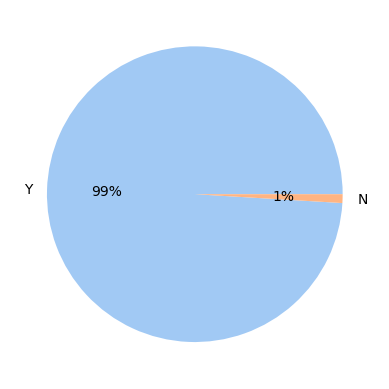

In [80]:
colors = sns.color_palette('pastel')[0:5]
#create pie chart 
plt.pie(df.shape, labels =['Y','N'], colors = colors, autopct='%.0f%%')
plt.show()

Respecto al grafico sobre la variable respuesta, se puede concluir que solo el 1% de los procedimientos policiales termina en arresto. 

- 4.2.Estudie la relación de la variable respuesta en comportamiento con la raza (race), comente.

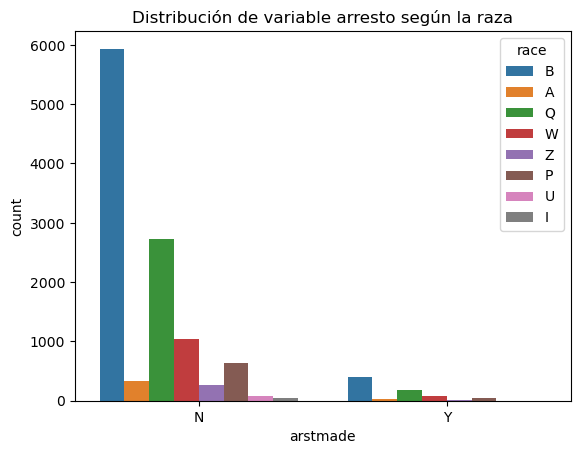

In [81]:
ax= sns.countplot(df, x="arstmade", hue="race")
plt.title("Distribución de variable arresto según la raza")
plt.show()

Respecto a los procedimientos, se puede destacar que la gran parte de estos se realiza a personas de raza B, Q y W. Resultando a su vez, pero en menor proporcion estas mismos tipos de razas, las que mas terminan en arresto.  

- 4.3 Estudie la relación de la variable respuesta en comportamiento con la sexo (sex), comente.

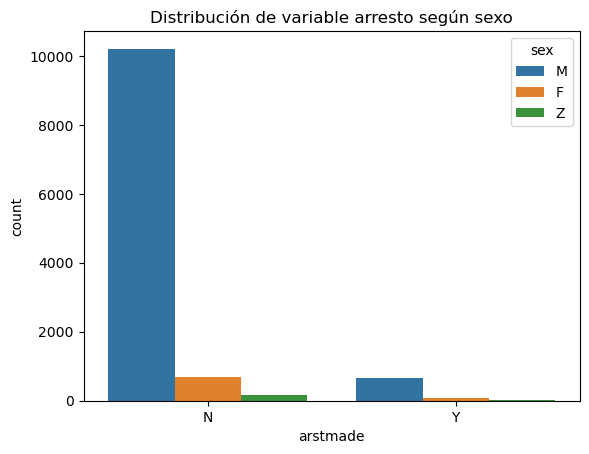

In [82]:
ax= sns.countplot(df, x="arstmade", hue="sex")
plt.title("Distribución de variable arresto según sexo")
plt.show()

La mayoría de los procedimientos policiales no terminan en arresto. Tanto si termina en arresto no, la mayor cantidad en cada
caso se presentar para el sexo masculino. De lo anterior se desprende que las personas de sexo masculino son las que más se ven involucradas en procedimientos policiales. Del total de arrestos, las personas de sexo masculino son las que en mayoría
terminanan arrestadas.Las personas de sexo femenino se ven involucradas en muy pocos procedimientos policiales y muy pocas veces terminan en violencia.

- 4.3 Estudie la relación de la variable respuesta en comportamiento con la sexo y la edad en su conjunto, comente.

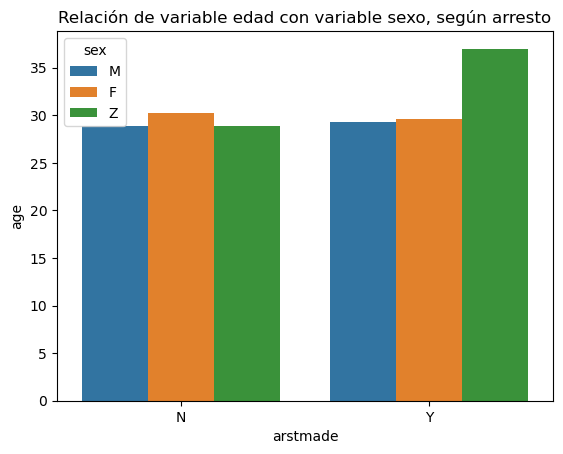

In [83]:
ax = sns.barplot(df, x="arstmade", y="age", hue="sex", ci=None)
plt.title("Relación de variable edad con variable sexo, según arresto")
plt.show()

*Se considerar el sexo Z, desconocido.

Todos los arrestos ocurren en personas con edades de 30, 31 0 32 años aproximadamente.  No parece haber una diferencia notoria en la variable arresto en relación con la edad, la distribución para cuando ha habido arresto como para cuando no lo ha
habido es bastante similar. Lo mismo ocurre considerando la variable sexo. Lo anterior da un indicio de que puede exister correlación entre la variable edad y sexo. Sin embargo, entra la variable edad y arresto, no parece haber correlacion.

- 4.4 Recodifique la variable respuesta a 1 y 0. Donde 0 es N y 1 es Y

In [84]:
df["arstmade"].replace({"N":0, "Y":1}, inplace=True)
df["arstmade"].value_counts()

0.0    11076
1.0      748
Name: arstmade, dtype: int64

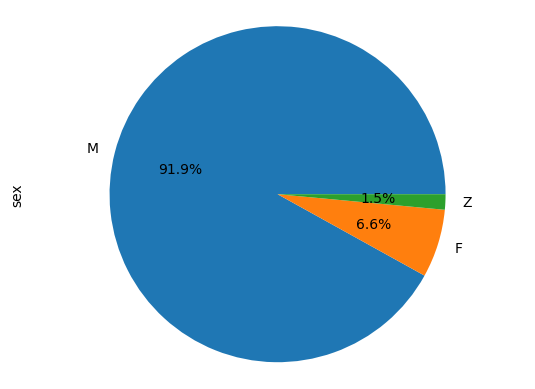

In [85]:
value_counts = df['sex'].value_counts()
value_counts.plot.pie(autopct="%1.1f%%")
plt.axis('equal')
#Ensure pie chartis circular
plt.show()

- 4.5 Muestre en un gráfico la probabilidad que un individuo sea arrestado,condicional al género y a la raza. ¿qué implicancias éticas tienen algunas conclusiones de lo que observa?.

sex  race  arstmade
F    A     0.0           27
           1.0            2
     B     0.0          336
           1.0           47
     I     0.0            4
     P     0.0           27
           1.0            3
     Q     0.0          176
           1.0           13
     U     0.0            7
     W     0.0          109
           1.0           10
     Z     0.0           16
M    A     0.0          312
           1.0           22
     B     0.0         5568
           1.0          347
     I     0.0           47
           1.0            1
     P     0.0          599
           1.0           39
     Q     0.0         2543
           1.0          173
     U     0.0           61
           1.0            2
     W     0.0          926
           1.0           68
     Z     0.0          151
           1.0           12
Z    A     0.0            1
     B     0.0           31
     P     0.0            3
     Q     0.0           15
           1.0            2
     U     0.0            7


Text(0, 0.5, 'y: Cantidad de fue arrestado')

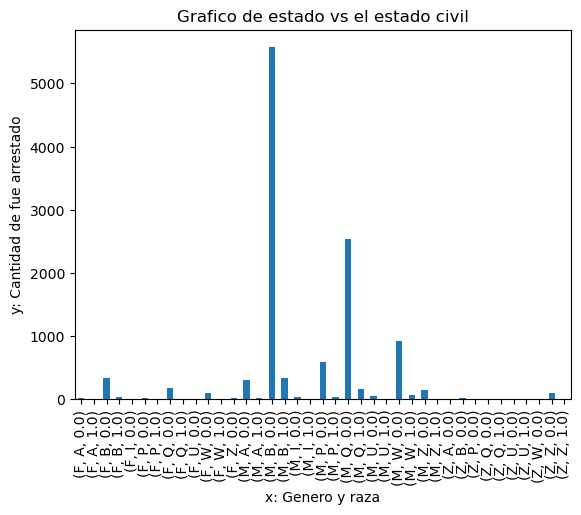

In [86]:
df6 = df.groupby(["sex", "race", 'arstmade'])['arstmade'].count()
print(df6)
df6.plot(kind="bar");
plt.title('Grafico de estado vs el estado civil')
plt.xlabel('x: Genero y raza')
plt.ylabel('y: Cantidad de fue arrestado')

In [87]:
b = df['sex'].astype(str) + ' - ' + df['race'].astype(str)
b

0        M - B
1        M - A
2        M - Q
3        M - B
4        M - Q
         ...  
11820    M - B
11821    M - Z
11822    M - W
11823    M - Q
11824    M - B
Length: 11825, dtype: object

In [88]:
pd.crosstab(b, df['arstmade'], margins=True)

arstmade,0.0,1.0,All
row_0,,,
F - A,27,2,29
F - B,336,47,383
F - I,4,0,4
F - P,27,3,30
F - Q,176,13,189
F - U,7,0,7
F - W,109,10,119
F - Z,16,0,16
M - A,312,22,334


Respecto a las implicancias sobre el sexo y la raza de un individuo, se puede identificar que la probabilidad mas grande de arrestro es de un individuo que sea de sexo masculino y de la raza B, luego viene que sea de sexo masculino y de raza Q. Lo que uede dar indicaciones de alguna impicancia condicionada por el sexo masculino y el tipo de raza B y Q.

5.- Determinar si el procedimiento policial concluirá en alguna acción violenta.

Los atributos que tienen el prefijo pf (['pf_hands'],['pf_wall'], ['pf_grnd'],
['pf_drwep'], ['pf_ptwep'],['pf_baton'],['pf_hcuff'], ['pf_pepsp'] y ['pf_other']) indican si hubo fuerza fisica utilizada por el oficial al momento del procedimiento, con la marca 'Y'.

Genere una nueva variable llamada 'violencia' la cual sea 1 si en cualquiera de
las 9 variables pf hubo alguna 'Y', y 0 en otro caso. Luego indique el porcentaje de casos que terminaron con violencia.

In [89]:
v1 = pd.concat([df['pf_hands'], df['pf_wall'], df['pf_grnd'], df['pf_drwep'], 
                df['pf_ptwep'], df['pf_baton'], df['pf_hcuff'], df['pf_pepsp'], df['pf_other']], axis=1)
v1

,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other
0,N,N,N,N,N,N,N,N,N
1,N,N,N,N,N,N,N,N,N
2,N,N,N,N,N,N,N,N,N
3,N,N,N,N,N,N,N,N,N
4,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...
11820,Y,N,N,N,N,N,N,N,N
11821,N,N,N,N,N,N,N,N,N
11822,N,N,N,N,N,N,N,N,N
11823,Y,N,N,N,N,N,N,N,N


In [90]:
v2 = v1[v1.pf_hands.isin(['Y']) | v1.pf_wall.isin(['Y']) | v1.pf_grnd.isin(['Y']) | v1.pf_drwep.isin(['Y']) 
    | v1.pf_ptwep.isin(['Y']) | v1.pf_baton.isin(['Y']) | v1.pf_hcuff.isin(['Y']) | v1.pf_pepsp.isin(['Y']) 
    | v1.pf_other.isin(['Y'])]
v2

,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other
8,Y,N,N,N,N,N,N,N,N
13,Y,N,N,N,N,N,N,N,N
23,Y,N,N,N,N,N,N,N,N
25,Y,N,N,N,N,N,N,N,N
26,Y,N,N,N,N,N,Y,N,N
...,...,...,...,...,...,...,...,...,...
11804,Y,N,N,N,N,N,N,N,N
11808,Y,N,N,N,N,N,N,N,N
11810,Y,N,N,N,N,N,N,N,N
11820,Y,N,N,N,N,N,N,N,N


In [91]:
import itertools
Violencia1 = list(itertools.repeat(1, v2.size))
Violencia2 = list(itertools.repeat(0, v1.size-v2.size))
Porcentaje = round((len(Violencia1)/(len(Violencia1) + len(Violencia2)))*100, 2)
print('El porcentaje de casos que termino en vilencia fueron el :', Porcentaje, '% de los casos')

El porcentaje de casos que termino en vilencia fueron el : 24.58 % de los casos


6.- Modelación
- 6.1 Genere las variables dummies correspondientes (Tenga cuidado de no utilizar variables que expliquen lo mismo, ¡recuerde que acaba de crear una variable a partir de otras!, además recuerde que creó una variable numérica que es una categoría :) ). Luego genere los sets de train-test utilizando el año 2009 para entrenar, y el año 2010 para testear.

In [92]:
df7 = pd.get_dummies(df)
df7

,Unnamed: 0,year,pct,ser_num,datestop,timestop,perobs,perstop,arstmade,compyear,...,detailcm_85,detailcm_86,detailcm_87,detailcm_9,detailcm_92,detailcm_93,detailcm_95,detailcm_96,detailcm_97,detailcm_98
0,178048,2009,41,1779,4032009,130,1.0,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,498873,2009,108,5805,10292009,1050,3.0,5.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,463573,2009,43,8340,10062009,1450,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,43626,2009,77,932,1232009,1843,5.0,5.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,563921,2009,110,11224,12132009,1655,3.0,10.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11820,449178,2010,60,7062,9262010,45,2.0,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
11821,362162,2010,75,15797,7302010,10,1.0,1.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
11822,208893,2010,123,830,4302010,1630,3.0,5.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
11823,551820,2010,115,13122,11232010,2100,1.0,5.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0


In [93]:
X= df7[['sb_other_Y', 'searched_Y', 'contrabn_Y', 'pf_hcuff_Y', 'sb_hdobj_Y',
        'rf_othsw_Y', 'ac_rept_Y', 'sector_K', 'cs_drgtr_Y', 'sumissue_Y',
        'cs_lkout_Y', 'offverb_Y', 'knifcuti_Y', 'pf_hands_Y', 'city_MANHATTAN',
        'frisked_N', 'inout_I','radio_Y', 'typeofid_V','cs_objcs_Y','offunif_N',
        'ac_incid_N','sb_outln_Y','ac_assoc_Y','pf_wall_Y','rf_attir_Y',
        'sector_E', 'rf_furt_Y','haircolr_GY','ac_time_Y','year',
        
       ]]
X

,sb_other_Y,searched_Y,contrabn_Y,pf_hcuff_Y,sb_hdobj_Y,rf_othsw_Y,ac_rept_Y,sector_K,cs_drgtr_Y,sumissue_Y,...,ac_incid_N,sb_outln_Y,ac_assoc_Y,pf_wall_Y,rf_attir_Y,sector_E,rf_furt_Y,haircolr_GY,ac_time_Y,year
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,2009
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,2009
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,2009
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,2009
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11820,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,2010
11821,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,2010
11822,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,2010
11823,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,1,2010


In [94]:
y = df7[['arstmade','year']]

y_train1 = y[y['year'] == 2009]
y_test2 = y[y['year'] == 2010]
y_test1 = y_test2[0:5812]

y_train = y_train1.drop(['year'], axis=1) 
y_test = y_test1.drop(['year'], axis=1) 

print(y_train)
print(y_test)
y

      arstmade
0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
...        ...
5807       1.0
5808       0.0
5809       0.0
5810       1.0
5811       0.0

[5812 rows x 1 columns]
       arstmade
5812        0.0
5813        0.0
5814        0.0
5815        0.0
5816        0.0
...         ...
11619       0.0
11620       0.0
11621       0.0
11622       0.0
11623       0.0

[5812 rows x 1 columns]


,arstmade,year
0,0.0,2009
1,0.0,2009
2,0.0,2009
3,0.0,2009
4,0.0,2009
...,...,...
11820,0.0,2010
11821,0.0,2010
11822,0.0,2010
11823,0.0,2010


In [95]:
X_train = X[X['year'] == 2009]
X_test1 = X[X['year'] == 2010]
X_test = X_test1[0:5812]
print(X_train)
print(X_test)

      sb_other_Y  searched_Y  contrabn_Y  pf_hcuff_Y  sb_hdobj_Y  rf_othsw_Y  \
0              0           0           0           0           0           0   
1              0           1           0           0           1           0   
2              0           0           0           0           0           0   
3              0           0           0           0           0           0   
4              0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
5807           0           1           0           0           1           0   
5808           0           0           0           0           0           0   
5809           0           0           0           0           0           0   
5810           1           1           0           1           0           0   
5811           0           0           0           0           0           0   

      ac_rept_Y  sector_K  cs_drgtr_Y  

In [96]:
tuned_parameters = [
    {"kernel": ["linear"]},
    {"kernel": ["poly"], "degree": [2, 3]},
    {"kernel": ["rbf"]},
]

In [97]:
clf = GridSearchCV(SVR(), tuned_parameters, cv=5,scoring= 'r2')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'kernel': ['linear']},
                         {'degree': [2, 3], 'kernel': ['poly']},
                         {'kernel': ['rbf']}],
             scoring='r2')

- 6.2 Entrene 2 modelos de clasificación y reporte el mejor modelo bajo algún criterio.

In [98]:
print("Mejor conjunto de parámetros:")
print()
print(clf.best_params_)
print()
print("Media y desviación:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Mejor conjunto de parámetros:

{'kernel': 'linear'}

Media y desviación:

0.312 (+/-0.121) for {'kernel': 'linear'}
-0.029 (+/-0.012) for {'degree': 2, 'kernel': 'poly'}
-0.029 (+/-0.012) for {'degree': 3, 'kernel': 'poly'}
-0.029 (+/-0.012) for {'kernel': 'rbf'}


Entre los modelos de clasificacion, los mejores son el Kerner y el Lineal.

¿Que puede hacer para mejorar la predicción de los modelos?

Para mejorar los modelos se pueden limpiar los nalores NAN de ingreso, o para esto valores asumir el valor promedio de los demas valores.